# Project: TMDb Movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction
**The dataset (TMDb Movies) contains information gathered from about 10,000 movies from the Kaggle movie database**
**and this is the link The dataset :https://www.kaggle.com/tmdb/tmdb-movie-metadata**
**I performed an analysis of this data and the following questions were asked:** 
>  
> 1 - Which movie title had the highest budget?
>
> 2- Which movie title had the highest revenue ?
>
>3- Which movies are the most popular ?
>
>4- Which movie title had the highest vote count?
>
> 5-Which genres are most popular from year to year?
>
> 6-  Is there a relationship between revenue and budget? 

**The data will be cleaned first of any duplication or errors in the data or bridging the imbalance in the data, then after that the data will be discovered using descriptive statistics and illustrations in its various forms and an answer to all the questions that were asked above, and then measure the correlation between the columns (all the variable) and after that This passes the conclusions stage**

<a id='wrangling'></a>
# Data Wrangling


### General Properties

In [1]:
# Import libriries (numpy - pandas - matplotlib - seaborn) 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

**Here, the data is downloaded and the first five rows are displayed for viewing :**

In [2]:
# Use pandas libriry to raed data 
# and view the frist 5 rows 
df=pd.read_csv("tmdb.csv")
df.head(10)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W..

In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
df.shape

(10866, 21)

**We found that the number of films in this data equals 10866 and that the number of columns equals 21**

>

# Data Cleaning 
>
>

In [5]:
# Show some properties for columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
#Delete columns that are not used in the analysis
df.drop(['imdb_id','homepage','keywords','production_companies','tagline'],axis=1,inplace=True)

### Missing Data

In [7]:
# Dealing with missing data
df['genres'].ffill(inplace=True)
df['overview'].bfill(inplace=True)
df['cast'].fillna('0',inplace=True)
df['director'].fillna('0',inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   cast            10866 non-null  object 
 6   director        10866 non-null  object 
 7   overview        10866 non-null  object 
 8   runtime         10866 non-null  int64  
 9   genres          10866 non-null  object 
 10  release_date    10866 non-null  object 
 11  vote_count      10866 non-null  int64  
 12  vote_average    10866 non-null  float64
 13  release_year    10866 non-null  int64  
 14  budget_adj      10866 non-null  float64
 15  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.3+ MB


### Duplicated Data

In [9]:
#Find the duplicate row
df[df.duplicated()]

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0


In [10]:
# Delete duplicate row
df.drop_duplicates(inplace=True)

**It was found that there was row number 2090 for movie id 42194 duplicated and it was deleted**
>

### Wrong data

In [85]:
#Converting data type from int64 to datetime in runtime
#Converting data type from object to datetime in release_year
df['runtime']=pd.to_datetime(df['runtime'])
df['release_year']=pd.to_datetime(df['release_year'])

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10865 non-null  int64         
 1   popularity      10865 non-null  float64       
 2   budget          10865 non-null  int64         
 3   revenue         10865 non-null  int64         
 4   original_title  10865 non-null  object        
 5   cast            10865 non-null  object        
 6   director        10865 non-null  object        
 7   tagline         8041 non-null   object        
 8   overview        10865 non-null  object        
 9   runtime         10865 non-null  datetime64[ns]
 10  genres          10865 non-null  object        
 11  release_date    10865 non-null  object        
 12  vote_count      10865 non-null  int64         
 13  vote_average    10865 non-null  float64       
 14  release_year    10865 non-null  datetime64[ns]
 15  bu

<a id='eda'></a>
# Exploratory Data Analysis

>

**Now we will display summary statistics of the data set to identify the properties of this data**
>
>

In [21]:
df.describe()

,id,popularity,budget,revenue,vote_count,vote_average,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,217.399632,5.975012,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,575.644627,0.935138,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,17.000000,5.400000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,38.000000,6.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,146.000000,6.600000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,9767.000000,9.200000,4.250000e+08,2.827124e+09


# The answer to the  questions 

## 1- Which movie title had the highest budget?

In [91]:
# Find average budgets for movies
np.mean(df['budget'])

14624286.06433502

**The average movie budget is equal to it 14624286.06433502 $**

In [92]:
#Find maxmum budgets for movies
np.max(df['budget'])

425000000

**The maxmum movie budget is equal to it 425000000 $**

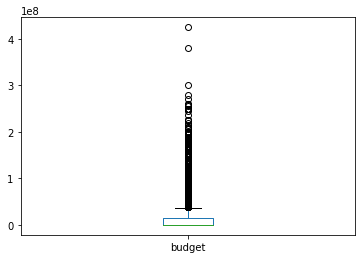

In [89]:
df['budget'].plot(kind='box');

**The previous box plot 5 number summary of the budget shows the films in the data subject of the study, and it is clear to us 
from the following figure:**
>
>1- Type the skiw-right curve
>
>2- There are outliers in the data
>
>3- The largest value in the budgets is 425 million
>
>4- The average value of the budgets is equal to 14624286.064

In [90]:
max1 = df['budget'] == 425000000.0
df[max1]

,id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,Assassin. Hero. Legend.,An Asian assassin (Dong-gun Jang) is forced to...,1970-01-01 00:00:00.000000100,Adventure|Fantasy|Action|Western|Thriller,12/02/2010,74,6.4,1970-01-01 00:00:00.000002010,425000000.0,11087569.0


### We found in row  2244 and id = 46528 that our biggest budget movie is : The Warrior's Way

## 2- Which movie title had the highest revenue ?

In [93]:
np.mean(df['revenue'])

39826896.07685228

**The average movie revenue is equal to it 39826896.07685 $**

In [94]:
np.max(df['revenue'])

2781505847

**The maxmum movie revenue is equal to it 2781505847 $**

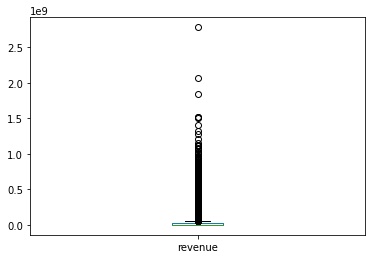

In [95]:
df['revenue'].plot(kind='box');

**The previous box plot 5 number summary of the revenue shows the films in the data subject of the study, and it is clear to us 
from the following figure:**
>
>1- Type the skiw-right curve
>
>2- There are outliers in the data
>
>3- The largest value in the budgets is 39826896.07685228
>
>4- The average value of the budgets is equal to 2781505847

In [97]:
max2 = df['revenue'] == 2781505847
df[max2]

,id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...",1970-01-01 00:00:00.000000162,Action|Adventure|Fantasy|Science Fiction,12/10/2009,8458,7.1,1970-01-01 00:00:00.000002009,240886902.9,2.827124e+09


### We found in row  1386 and id = 19995 that our biggest revenue movie is : Avatar

## 3- Which movies are the most popular ?

In [71]:
np.max(df['popularity'])

32.985763

In [99]:

max3 = df['popularity'] == 32.985763
df[max3]

,id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,1970-01-01 00:00:00.000000124,Action|Adventure|Science Fiction|Thriller,06/09/2015,5562,6.5,1970-01-01 00:00:00.000002015,137999939.3,1.392446e+09


### We found in row  0 and id = 135397 that our most populor movie is Original title is  : Jurassic World

## 4- Which movie title had the highest vote count?

In [70]:
df[df['vote_count']==np.max(df['vote_count'])]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,http://inceptionmovie.warnerbros.com/,Christopher Nolan,Your mind is the scene of the crime.,...,"Cobb, a skilled thief who commits corporate es...",1970-01-01 00:00:00.000000148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,7/14/10,9767,7.9,1970-01-01 00:00:00.000002010,160000000.0,825500000.0


### We found in row  1919 and id = 27205 that our highest vote count movie is Original title is  : Inception


## 5-Which genres are most popular from year to year? 


In [9]:
sum(df['genres'].duplicated())

8826

In [139]:
f= pd.value_counts(df['genres'].values,sort=False)
ma=f.max()
ma

712

In [10]:
f[f== 712]

NameError: name 'f' is not defined

,mean,std
genres,,
Comedy,2.318910e+07,2.145831e+07
Comedy|Drama,1.731101e+07,1.798798e+07
Documentary,2.592782e+06,4.251575e+06
Drama,1.825644e+07,1.986337e+07
Drama|Romance,1.839379e+07,1.740442e+07


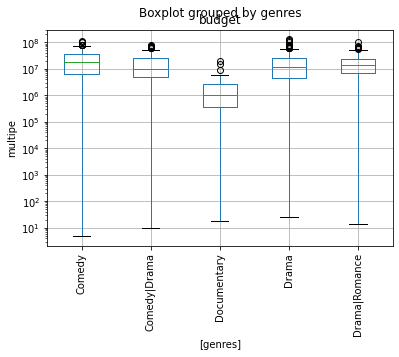

In [5]:
df_1=df.groupby(['genres'])[['id']].count().sort_values(by=['id'] ,ascending=False)[0:5]
df_new=df[df['genres'].isin(df_1.index.values.tolist())]
df_new1=df_new[df_new['budget']>0]
df_new1.boxplot(column='budget',by=['genres'],rot=90).set_yscale('log')
plt.ylabel("multipe")
pd.DataFrame(df_new1.groupby(['genres'])['budget'].describe().loc[:,['mean','std']])

,id
genres,
Comedy,292
Comedy|Drama,116
Documentary,35
Drama,317
Drama|Romance,147


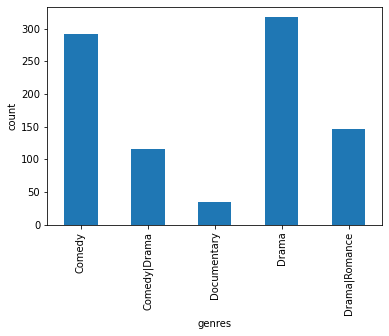

In [6]:
df_new1.groupby(['genres'])['id'].count().plot(kind='bar').set_ylabel('count')
df_new1.groupby(['genres'])[['id']].count()

**It is evident from the graph and the previous data that the most types of films in these evaluations are the following three types :**
>1- Drama 
>
>2- Comedy 
>
>3-Documentary 


##  6-  Is there a relationship between revenue and budget?


correlation : (0.7349006819076119, 0.0)


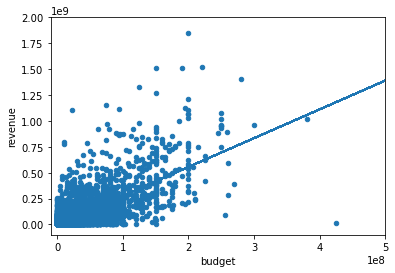

In [170]:
import statsmodels.api as sm
import scipy
# regress "expression" onto "motifScore" (plus an intercept)
model = sm.OLS(df.revenue, sm.add_constant(df.budget))
p = model.fit().params
# generate x-values for your regression Line (two is sufficient)
x = df.revenue
# scatter-plot data
ax = df.plot(x='budget', y='revenue', kind='scatter')
# plot regression line on the same axes, set x-axis limits
ax.plot(x, p.const + p.budget* x)
ax.set_xlim([-10000000,500000000])
ax.set_ylim([-100000000,2000000000])
print ("correlation :",scipy.stats.pearsonr(df.budget, df.revenue) )

**It is evident from the previous spread that there is a relationship between the revenue budget and the balance of payments, and this relationship is a strong direct relationship, that is, the higher the payments, the higher the revenue.**


## What kind of relationship is this?

**Type of this relationship: A strong direct relationship**

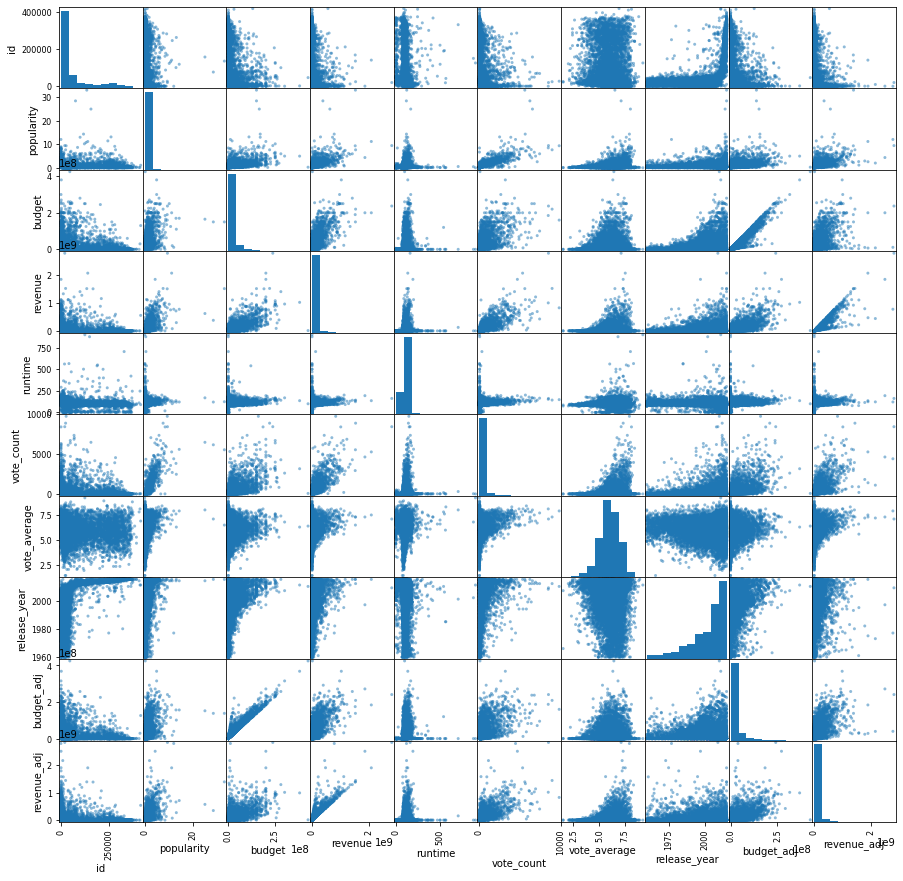

In [173]:
pd.plotting.scatter_matrix(df,figsize=(15,15));

**The previous figure shows us the scatter matrix, which shows us the relationship between all the variables, whether they are direct or inverse, as well as whether they are strong, weak or complete.**
**We notice in the sub-diagonal that the shapes represent histograms of the variable, while the rest of the shapes are forms of propagation**

# Conclusions Phase

**The number of samples included in the data is 10865 film, which is a large number and can represent the community under study, and there were missing data in this data, the reason for the loss is not known, it was through an error in the entry or damage to the data, but it was dealt with so that this does not affect the data Study location**

<a id='conclusions'></a>
# Conclusions



### In this analysis, the following was done:
> 1- The data has been downloaded and handled with accuracy
>
>2- The data was cleaned of any missing data or duplicate data, as well as correcting the error
?
>3- The following questions have been answered:

>>a - Which movie title had the highest budget? -->> The warrior’s Way
        
>
>> b- Which movie title had the highest revenue ?-->> Avatar
>
>>c- Which movies are the most popular ?-->> Jurassic world
>
>> d- Which movie title had the highest vote count?-->>Inception
 
     e-Which genres are most popular from year to year? -->> Drama
     f-It is evident from the previous spread that there is a relationship between the revenue budget and the balance of payments, and this relationship is a strong direct relationship, that is, the higher the payments, the higher the revenue.**
        

>4- The answers were compared with graphs that illustrate the answer
>
>5- Conclusions Phase -->>The previous figure shows us the scatter matrix, which shows us the relationship between all the variables, whether they are direct or inverse, as well as whether they are strong, weak or complete.We notice in the sub-diagonal that the shapes represent histograms of the variable, while the rest of the shapes are forms of propagation
